# Exploratory Data Analysis of Word Ratings

By Eline De Witte

I worked with a Dutch and the English dataset of many common words. For each word participants rated how pleasant they found it (Valence), how dominant the word is (Dominance) and how much arousal it triggers (Arousal). For the Dutch words participants were asked at what age they thought they learned a word.

Here is an overview of the different steps I took

1. Analyses with the Dutch words

     1. A first look: data cleaning
     2. Analyses on the whole population
     3. Comparing men and women
     4. Conclusions

2. Analyses with the English words

     1. A first look: data cleaning
     2. Analyses on the whole population
     3. Comparing men and women
     4. Comparing young and old
     5. Comparing people with high and low education
     6. Conclusions

3. Comparing the Dutch and the English words

    1. Match the words
    2. Compare the scores

In [1]:
#load modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
#load datasets
nederlands = pd.read_excel('nederlandsewoorden.xlsx')
engels = pd.read_csv('engelsewoorden.csv')

# 1. Analysis with the Dutch Words

### 1.1. A first look

In this section you will find the following analyses:
I run a few exploratory lines to know what the dataset looks like. It becomes immediately clear that the column names are not ideal. Therefore I will rename the columns, with titles that I find clear. Then I delete the first row since it does not contain information about words. I find the dataframe too big. Therefor I will create 3 seperate dataframes: 'Nediedereen' contains information on men and women. 'Dutchmen' contains information only on men and 'DutchWOmen' contains information only on women's perspective on these words. I also noticed that the type of these columns is 'object' and this later does not allow me to calculate correlations, so I changed the datatype to 'float64'.

The new titles of the columns have 3 components: (The 6 last columns are different)
1. The measure they relate to, i.e. Valence, Dominance, Arousal or Age of Aquisition
2. The statistic, i.e. mean (M), standard diviation (SD) or number of participants (N)
3. The group the scores apply to, i.e. all (A), men (M) or women (W)

In [3]:
print(nederlands.shape)
print(nederlands.columns)
print(nederlands.info())
nederlands.head()

(4300, 43)
Index(['Unnamed: 0', 'Unnamed: 1', 'All', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Men',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Women', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   4300 non-null   object
 1   Unnamed: 1   4300 non-null   object
 2   All   

,Unnamed: 0,Unnamed: 1,All,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,Words,Translation,M V,SD V,N V,M A,SD A,N A,M P,SD P,...,SD P,N P,M AoA,SD AoA,N AoA,Freq(Log10),Freq (1E6),Length,N (%),Grammatical category
1,aaien,to stroke,5.203125,0.738503,64,3.96875,1.246821,64,3.4375,1.12511,...,1.075759,32,4.8125,2.166987,16,0.323014,2.103847,5,0,V
2,aal,eel,3.421875,0.751817,64,3.9,1.480953,60,3.438596,1.118314,...,1.120897,27,8.6,2.063284,15,-0.096706,0.800376,3,5.381166,N
3,aalmoes,alms,3.296875,0.986893,64,3.098361,1.164831,61,2.8125,1.307791,...,1.319824,32,9.714286,2.584825,14,-0.017524,0.960452,7,2.242152,N
4,aandachtig,attentive,5.296875,0.682658,64,4.875,1.091089,64,4.875,0.863731,...,0.592289,32,7.625,2.093641,16,0.367826,2.332526,10,0,A


In [4]:
verbeter1 = nederlands.rename(columns= {'Unnamed: 0': 'Words', 'Unnamed: 1': 'Translation', 'All': 'ValenceMA', 'Unnamed: 3': 'ValenceSDA', 'Unnamed: 4' : 'ValenceNA',
       'Unnamed: 5' : 'ArousalMA', 'Unnamed: 6': 'ArousalSDA', 'Unnamed: 7': 'ArousalNA', 'Unnamed: 8': 'DominanceMA', 'Unnamed: 9' : 'DominanceSDA',
       'Unnamed: 10': 'DominanceNA', 'Unnamed: 11': 'AoAMA', 'Unnamed: 12': 'AoASDA', 'Unnamed: 13': 'AoANA', 'Men': 'ValenceMM',
       'Unnamed: 15': 'ValenceSDM', 'Unnamed: 16' : 'ValenceNM', 'Unnamed: 17': 'ArousalMM', 'Unnamed: 18': 'ArousalSDM',
       'Unnamed: 19': 'ArousalNM', 'Unnamed: 20': 'DominanceMM', 'Unnamed: 21' : 'DominanceSDM', 'Unnamed: 22': 'DominanceNM',
       'Unnamed: 23': 'AoAMM', 'Unnamed: 24': 'AoASDM', 'Unnamed: 25': 'AoANM', 'Women': 'ValenceMW', 'Unnamed: 27': 'ValenceSDW',
       'Unnamed: 28': 'ValenceNW', 'Unnamed: 29': 'ArousalMW', 'Unnamed: 30': 'ArousalSDW', 'Unnamed: 31': 'ArousalNW',
       'Unnamed: 32': 'DominanceMW', 'Unnamed: 33': 'DominanceSDW', 'Unnamed: 34': 'DominanceNW', 'Unnamed: 35': 'AoAMW',
       'Unnamed: 36': 'AoASDW', 'Unnamed: 37': 'AoANW', 'Unnamed: 38': 'Freq(Log10)', 'Unnamed: 39': 'Freq (1E6)',
       'Unnamed: 40': 'Length', 'Unnamed: 41': 'N (%)', 'Unnamed: 42':'Grammatical category'})

In [5]:
verbeter2 = verbeter1.drop([0])

In [6]:
HeelNederlands = verbeter2.iloc[:, :2] + verbeter2.iloc[:, 2:42].astype('float64')

In [7]:
# define list of column names
cols = ['Words', 'Translation', 'ValenceMA', 'ValenceSDA', 'ValenceNA','ArousalMA', 'ArousalSDA','ArousalNA', 'DominanceMA', 'DominanceSDA', 'DominanceNA', 'AoAMA', 'AoASDA', 'AoANA', 'Length']

# Create a Df by slicing the source DataFrame
Neder= verbeter2[cols]

#datatype set to float
deel2 = Neder.iloc[:, 2:14].astype('float64')
deel1= Neder.iloc[:, :2]
deel3= Neder.iloc[:, 14].astype('int8')
Nediedereen = pd.concat([deel1, deel2, deel3], axis=1) 

#inspect
print(Nediedereen.shape)
print(Nediedereen.info())
Nediedereen

(4299, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4299 entries, 1 to 4299
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Words         4299 non-null   object 
 1   Translation   4299 non-null   object 
 2   ValenceMA     4299 non-null   float64
 3   ValenceSDA    4299 non-null   float64
 4   ValenceNA     4299 non-null   float64
 5   ArousalMA     4299 non-null   float64
 6   ArousalSDA    4299 non-null   float64
 7   ArousalNA     4299 non-null   float64
 8   DominanceMA   4299 non-null   float64
 9   DominanceSDA  4299 non-null   float64
 10  DominanceNA   4299 non-null   float64
 11  AoAMA         4299 non-null   float64
 12  AoASDA        4299 non-null   float64
 13  AoANA         4299 non-null   float64
 14  Length        4299 non-null   int8   
dtypes: float64(12), int8(1), object(2)
memory usage: 508.0+ KB
None


,Words,Translation,ValenceMA,ValenceSDA,ValenceNA,ArousalMA,ArousalSDA,ArousalNA,DominanceMA,DominanceSDA,DominanceNA,AoAMA,AoASDA,AoANA,Length
1,aaien,to stroke,5.203125,0.738503,64.0,3.968750,1.246821,64.0,3.437500,1.125110,64.0,4.709677,2.052536,32.0,5
2,aal,eel,3.421875,0.751817,64.0,3.900000,1.480953,60.0,3.438596,1.118314,57.0,8.033333,2.385059,31.0,3
3,aalmoes,alms,3.296875,0.986893,64.0,3.098361,1.164831,61.0,2.812500,1.307791,64.0,9.379310,2.664767,30.0,7
4,aandachtig,attentive,5.296875,0.682658,64.0,4.875000,1.091089,64.0,4.875000,0.863731,64.0,7.516129,2.079599,32.0,10
5,aangenaam,pleasant,5.937500,0.709907,64.0,3.718750,1.302851,64.0,4.671875,1.069857,64.0,8.193548,2.056200,32.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,zwijgen,to keep silent,3.656250,0.894760,64.0,2.390625,1.063346,64.0,3.375000,1.278640,64.0,5.193548,1.778002,32.0,7
4296,zwijgzaam,taciturn,3.312500,0.774084,64.0,2.328125,0.992906,64.0,3.250000,1.195229,64.0,8.774194,2.499462,32.0,9
4297,zwijn,pig,3.218750,1.075982,64.0,4.343750,1.143911,64.0,4.359375,1.145969,64.0,5.774194,2.124613,32.0,5
4298,zwoegen,to toil,2.937500,0.906327,64.0,6.062500,0.774084,64.0,4.640625,1.337697,64.0,8.258065,2.529397,32.0,7


In [8]:
# define list of column names
cols = ['Words', 'Translation', 'ValenceMM', 'ValenceSDM', 'ValenceNM','ArousalMM', 'ArousalSDM','ArousalNM', 'DominanceMM', 'DominanceSDM', 'DominanceNM', 'AoAMM', 'AoASDM', 'AoANM']

# Create a Df by slicing the source DataFrame
man= verbeter2[cols]

#dattype set to float
deel2 = man.iloc[:, 2:].astype('float64')
deel1= man.iloc[:, :2]
Dutchmen = pd.concat([deel1, deel2], axis=1)

#inspect
print(Dutchmen.shape)

(4299, 14)


In [9]:
# define list of column names
cols = ['Words', 'Translation', 'ValenceMW', 'ValenceSDW', 'ValenceNW','ArousalMW', 'ArousalSDW','ArousalNW', 'DominanceMW', 'DominanceSDW', 'DominanceNW', 'AoAMW', 'AoASDW', 'AoANW']

# Create a Df by slicing the source DataFrame
women= verbeter2[cols]

#datatype set to float
deel2 = women.iloc[:, 2:].astype('float64')
deel1= women.iloc[:, :2]
DutchWOmen = pd.concat([deel1, deel2], axis=1)

#inspect
print(DutchWOmen.shape)

(4299, 14)


### 1.2. Analyses on the whole population

In this section you will find the following analyses: I inspected per mean (Valence, Arousal, Dominance and AoA/ Age of aquisition) what are the highest and lowest ranking words and I made a plot per mean: the x-axis has the mean and the y-axis the standard diviation of the responses people gave. Then I calculated the correlations between all variabels and inspected the ones that were surprisingly low or high.

In [10]:
#see the highest and lowest ranked words on valence
Nediedereen.sort_values('ValenceMA', ascending = False)

,Words,Translation,ValenceMA,ValenceSDA,ValenceNA,ArousalMA,ArousalSDA,ArousalNA,DominanceMA,DominanceSDA,DominanceNA,AoAMA,AoASDA,AoANA,Length
1004,gelukkig,happy,6.609375,0.632887,64.0,4.640625,1.462409,64.0,5.359375,1.200095,64.0,5.774194,1.430843,32.0,8
1900,liefde,love,6.531250,0.853913,64.0,5.593750,1.388373,64.0,5.578125,1.165710,64.0,5.838710,2.207514,32.0,6
1005,gelukkigheid,happiness,6.476190,0.618457,63.0,5.079365,1.383096,63.0,5.265625,1.144236,64.0,7.933333,2.391556,31.0,12
186,beeldschoon,beautiful,6.468750,0.712000,64.0,4.500000,1.380131,64.0,5.171875,1.303898,64.0,7.322581,2.534917,32.0,11
3988,vriendschap,friendship,6.421875,0.831993,64.0,4.703125,1.243136,64.0,5.187500,1.343710,64.0,5.838710,1.845658,32.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,roofmoord,murder with robbery,1.281250,0.700765,64.0,6.312500,1.067187,64.0,5.562500,1.631778,64.0,10.366667,2.846454,31.0,9
1291,Hitler,Hitler,1.281250,0.677735,64.0,5.484375,1.718177,64.0,5.984375,1.768258,64.0,9.193548,2.257127,32.0,6
1370,incest,incest,1.203125,0.509581,64.0,5.015625,1.628050,64.0,4.031250,2.336520,64.0,11.580645,2.717526,32.0,6
1472,kanker,cancer,1.156250,0.365963,64.0,4.875000,1.618347,64.0,5.312500,1.950783,64.0,8.838710,2.464370,32.0,6


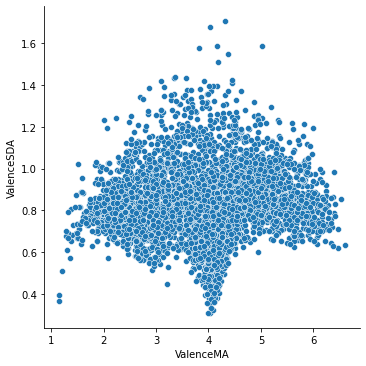

In [11]:
sns.relplot(x='ValenceMA', y='ValenceSDA', data=Nediedereen)

In [12]:
#see the highest and lowest ranked words on arousal
Nediedereen.sort_values('ArousalMA', ascending = False)

,Words,Translation,ValenceMA,ValenceSDA,ValenceNA,ArousalMA,ArousalSDA,ArousalNA,DominanceMA,DominanceSDA,DominanceNA,AoAMA,AoASDA,AoANA,Length
2370,ontploffing,explosion,2.093750,0.938062,64.0,6.515625,0.816345,64.0,5.812500,1.037013,64.0,7.032258,2.316375,32.0,11
1350,hyperactief,hyperactive,3.328125,1.127642,64.0,6.500000,1.181874,64.0,5.031250,1.321000,64.0,8.935484,2.731733,32.0,11
2432,orgasme,orgasm,6.234375,0.921389,64.0,6.484375,1.068929,64.0,5.906250,1.178090,64.0,11.290323,2.147767,32.0,7
2437,orkaan,hurricane,2.453125,1.082761,64.0,6.453125,0.871592,64.0,6.125000,1.253566,64.0,7.709677,1.883145,32.0,6
2237,neuken,to fuck,4.312500,1.707825,64.0,6.444444,0.798745,63.0,5.078125,1.504540,64.0,10.548387,2.062987,32.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,doodmoe,exhausted,2.156250,0.739342,64.0,1.750000,1.098339,64.0,3.234375,1.814773,64.0,6.774194,2.044663,32.0,7
2490,passief,passive,2.781250,0.700765,64.0,1.734375,1.087332,64.0,2.609375,1.216516,64.0,9.612903,2.691684,32.0,7
656,doodstil,silent,3.109375,0.993905,64.0,1.671875,0.943729,64.0,3.687500,1.651118,64.0,6.935484,2.421232,32.0,8
1889,levensloos,lifeless,1.687500,0.753300,64.0,1.593750,1.094267,64.0,2.484375,1.834348,64.0,8.966667,2.552664,31.0,10


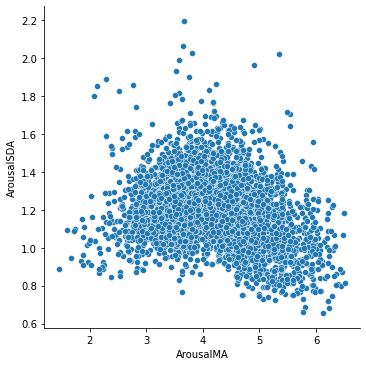

In [13]:
sns.relplot(x='ArousalMA', y='ArousalSDA', data=Nediedereen)

In [14]:
#see the highest and lowest ranked words on dominance
Nediedereen.sort_values('DominanceMA', ascending = False)

,Words,Translation,ValenceMA,ValenceSDA,ValenceNA,ArousalMA,ArousalSDA,ArousalNA,DominanceMA,DominanceSDA,DominanceNA,AoAMA,AoASDA,AoANA,Length
641,dominant,dominant,3.062500,0.906327,64.0,5.218750,1.201438,64.0,6.156250,1.143911,64.0,9.258065,2.804374,32.0,8
2001,macht,power,3.968750,1.356568,64.0,5.390625,1.135533,64.0,6.140625,1.005811,64.0,7.322581,2.271374,32.0,5
2437,orkaan,hurricane,2.453125,1.082761,64.0,6.453125,0.871592,64.0,6.125000,1.253566,64.0,7.709677,1.883145,32.0,6
3507,superieur,superior,4.375000,1.548168,64.0,5.046875,1.187631,64.0,6.125000,0.951190,64.0,10.193548,2.651029,32.0,9
599,dictator,dictator,1.734375,0.739845,64.0,5.328125,1.345831,64.0,6.125000,1.452966,64.0,10.000000,2.804758,32.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,fragiel,fragile,3.062500,0.814063,64.0,2.937500,1.096531,64.0,2.047619,0.974325,63.0,9.612903,3.383070,32.0,7
3135,slaaf,slave,1.890625,0.737159,64.0,4.234375,1.866515,64.0,2.046875,1.637164,64.0,7.483871,2.618791,32.0,5
2312,onderdaan,subject,2.671875,0.757076,64.0,3.171875,1.215700,64.0,2.031250,1.284446,64.0,8.548387,2.540849,32.0,9
2313,onderdanig,submissive,2.656250,0.858547,64.0,2.578125,1.218960,64.0,1.937500,1.412810,64.0,9.516129,2.618791,32.0,10


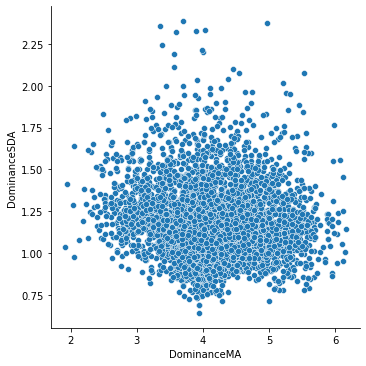

In [15]:
sns.relplot(x='DominanceMA', y='DominanceSDA', data=Nediedereen)

In [16]:
#see the highest and lowest ranked words on dominance
Nediedereen.sort_values('AoAMA', ascending = False)

,Words,Translation,ValenceMA,ValenceSDA,ValenceNA,ArousalMA,ArousalSDA,ArousalNA,DominanceMA,DominanceSDA,DominanceNA,AoAMA,AoASDA,AoANA,Length
1351,hypochondrisch,hypochondriac,2.215686,0.923336,51.0,4.716981,1.459417,53.0,3.297872,1.932726,47.0,14.583333,3.348155,25.0,14
2262,nonconformistisch,nonconformist,4.423729,1.162687,59.0,3.983607,1.310112,61.0,4.803279,1.435498,61.0,13.482759,3.699621,30.0,17
526,conformistisch,conformist,3.396552,1.107228,58.0,3.147541,1.222512,61.0,3.311475,1.297960,61.0,13.266667,3.938609,31.0,14
2048,matrix,matrix,4.093750,0.867742,64.0,3.634921,1.154257,63.0,4.619048,0.974325,63.0,12.935484,3.172123,32.0,6
2309,onconventioneel,unconventional,4.047619,1.098805,63.0,4.079365,1.298903,63.0,4.412698,1.466122,63.0,12.741935,3.161938,32.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,oma,grandmother,5.296875,1.079090,64.0,2.984375,1.161447,64.0,3.656250,1.416667,64.0,3.225806,1.359158,32.0,3
172,bed,bed,5.109375,0.944780,64.0,2.343750,1.287532,64.0,3.875000,0.951190,64.0,3.193548,1.249516,32.0,3
3149,slapen,to sleep,5.500000,1.038925,64.0,1.906250,1.108678,64.0,3.640625,1.264499,64.0,3.064516,1.289328,32.0,6
2479,papa,papa,5.593750,1.217840,64.0,4.421875,1.165710,64.0,5.078125,1.158881,64.0,2.064516,0.892020,32.0,4


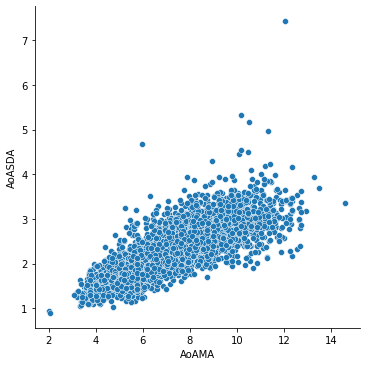

In [17]:
sns.relplot(x='AoAMA', y='AoASDA', data=Nediedereen)

The last plot shows 2 measures: the average aquisistion age average and the standard deviation. 'AoA' was actually measured by asking when people think they acquired a certain word. So this plot shows that the later people think they learned a word the more of a difference there seems to be between the answers of the participants. Participants give more similar answers for words such as 'mama' and 'papa', then 'hypochondrisch'. I have calculated the correlation between the 2 variables in the next cell:

In [18]:
Nediedereen['AoAMA'].corr(Nediedereen['AoASDA'])

0.8000083744524598

Then I was motivated to know all correlations:

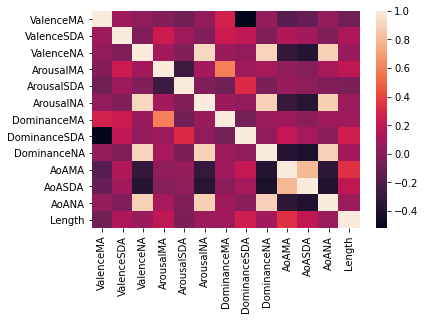

In [19]:
correlations = Nediedereen.corr()
sns.heatmap(correlations)
plt.show()

Some correlations here are not so interesting: the variables ending in 'NA' stand for the amount of participants that were in a certain condition. Their correlation with other measures does not reflect pscyhologically or linguisticly interesting findings.
In this plot I see five interesting corelations:
  1. The Age of aquisition average and its standard diviation.
  2. The mean and the standard diviation of Arousal are negativly correlated.
  2. The mean of Valence of the standard deviation of Dominance are correlated. 
  3. Arousal and Dominance mean.
  4. The length of a word and the average estimated age of acquisistion
    
I calculate and plot the last 3 correlations (the other 2 are plotted above)

-0.5216775548635484
0.5933643808686541
0.3348386461517908


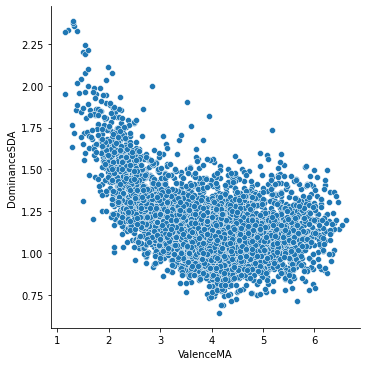

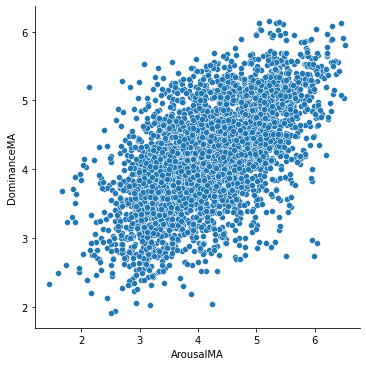

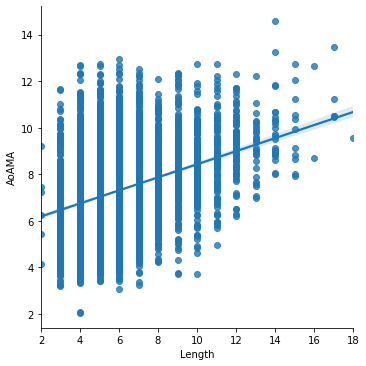

In [21]:
print(Nediedereen['ValenceMA'].corr(Nediedereen['DominanceSDA']))
sns.relplot(x='ValenceMA', y='DominanceSDA', data= Nediedereen)
print(Nediedereen['ArousalMA'].corr(Nediedereen['DominanceMA']))
sns.relplot(x='ArousalMA', y='DominanceMA', data= Nediedereen)
print(Nediedereen['AoAMA'].corr(Nediedereen['Length']))
sns.lmplot(x='Length', y='AoAMA', data= Nediedereen)

0.27066910107519304


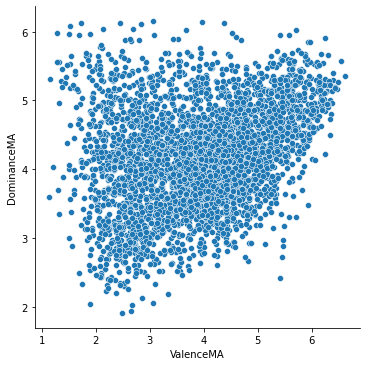

In [22]:
print(Nediedereen['ValenceMA'].corr(Nediedereen['DominanceMA']))
sns.relplot(x='ValenceMA', y='DominanceMA', data= Nediedereen)

The corelation between standard deviation of Dominance and the average Valence rating a word insinuates that the lower the average Valence score of a word, the more participants agreed on what score for dominance it should get. Perhaps words with a more negative meaning are easier to rate in dominance? There is no clear strong correlation between the average Valence and Dominance-score (0.27). There is perhaps a tendency for words with more positive scores to have higher dominance-scores, but as is shown in the last graph, it is not that clear.
The second corelation shows that words higher in arousal tend to be also higher in average dominance score.
The third corelations shows that the longer a word is, the later in life we learn it.

Next, I would like to show 3 measures in 1 plot. However, to be able to do this I have to convert 1 variable into a categorical variable. For this 2 purposes I will add 1 column to the dataframe.

In [23]:
#Make dominance categorical.
DominanceMAlist = Nediedereen['DominanceMA'].to_list()
domcat=[]
for score in DominanceMAlist:
    score1= int(score)
    if score1== 1 or score1==2:
        score2=1
    if score1== 3 or score1==4 or score1==5:
        score2=2
    if score1==6 or score1==7:
        score2=3
    domcat.append(score2)

#add new columns
Nediedereen['Dominancecategories']= domcat

#make sure these are integers
deel2 = Nediedereen.iloc[:, 15:].astype('int8')
deel1= Nediedereen.iloc[:, :15]
Nediedereen = pd.concat([deel1, deel2], axis=1)

Nediedereen

,Words,Translation,ValenceMA,ValenceSDA,ValenceNA,ArousalMA,ArousalSDA,ArousalNA,DominanceMA,DominanceSDA,DominanceNA,AoAMA,AoASDA,AoANA,Length,Dominancecategories
1,aaien,to stroke,5.203125,0.738503,64.0,3.968750,1.246821,64.0,3.437500,1.125110,64.0,4.709677,2.052536,32.0,5,2
2,aal,eel,3.421875,0.751817,64.0,3.900000,1.480953,60.0,3.438596,1.118314,57.0,8.033333,2.385059,31.0,3,2
3,aalmoes,alms,3.296875,0.986893,64.0,3.098361,1.164831,61.0,2.812500,1.307791,64.0,9.379310,2.664767,30.0,7,1
4,aandachtig,attentive,5.296875,0.682658,64.0,4.875000,1.091089,64.0,4.875000,0.863731,64.0,7.516129,2.079599,32.0,10,2
5,aangenaam,pleasant,5.937500,0.709907,64.0,3.718750,1.302851,64.0,4.671875,1.069857,64.0,8.193548,2.056200,32.0,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,zwijgen,to keep silent,3.656250,0.894760,64.0,2.390625,1.063346,64.0,3.375000,1.278640,64.0,5.193548,1.778002,32.0,7,2
4296,zwijgzaam,taciturn,3.312500,0.774084,64.0,2.328125,0.992906,64.0,3.250000,1.195229,64.0,8.774194,2.499462,32.0,9,2
4297,zwijn,pig,3.218750,1.075982,64.0,4.343750,1.143911,64.0,4.359375,1.145969,64.0,5.774194,2.124613,32.0,5,2
4298,zwoegen,to toil,2.937500,0.906327,64.0,6.062500,0.774084,64.0,4.640625,1.337697,64.0,8.258065,2.529397,32.0,7,2


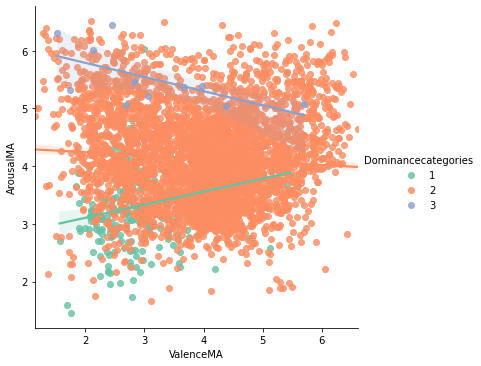

In [26]:
sns.lmplot(x='ValenceMA', y='ArousalMA', hue='Dominancecategories', palette="Set2", data=Nediedereen)

Clearly most words belong to the middle category for the Dominance mean as most dots belong to the 2nd category.
Words that score low on Dominance (green dots), tend to score lower on the Valence and Arousal mean as well.
Further words that score low for Valence and high for Arousal tend to score higher for Dominance. These words are thus negative words that elecit Arousal in people.

### 1.3. Comparing men and women

I started out by calculating the corelations between the 4 means for men and women. The corelations are very high signalling that men and women have very similar answers. I plotted the corelation between average Dominance score for men and women and that indeed shows that the scores are very similar: the points lay closely to the diagonal. I did found some differences in the standard diviations for men and women and I plotted the 2 lowest corelations.

In [28]:
print(Dutchmen['ValenceMM'].corr(DutchWOmen['ValenceMW']))
print(Dutchmen['ArousalMM'].corr(DutchWOmen['ArousalMW']))
print(Dutchmen['DominanceMM'].corr(DutchWOmen['DominanceMW']))
print(Dutchmen['AoAMM'].corr(DutchWOmen['AoAMW']))

0.9754614823939878
0.93476032216309
0.8903846536764525
0.9334071515633618


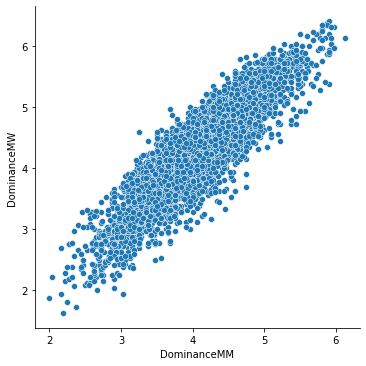

In [29]:
sns.relplot(x='DominanceMM', y='DominanceMW', data=verbeter2)

In [30]:
print(Dutchmen['ValenceSDM'].corr(DutchWOmen['ValenceSDW']))
print(Dutchmen['ArousalSDM'].corr(DutchWOmen['ArousalSDW']))
print(Dutchmen['DominanceSDM'].corr(DutchWOmen['DominanceSDW']))
print(Dutchmen['AoASDM'].corr(DutchWOmen['AoASDW']))

0.6156594381718444
0.38648184588360285
0.5902569236338875
0.460180403290785


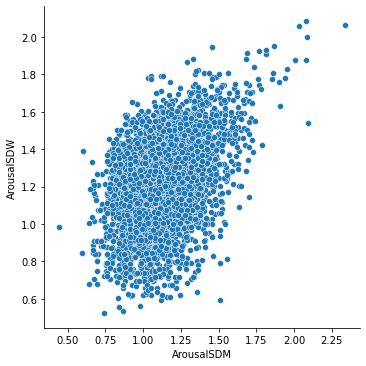

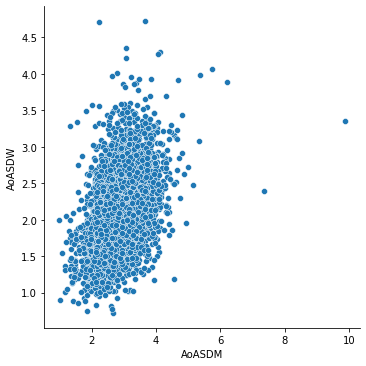

In [31]:
sns.relplot(x='ArousalSDM', y='ArousalSDW', data=verbeter2)
sns.relplot(x='AoASDM', y='AoASDW', data=verbeter2)

In these 3 plots I mainly want to focus on what points do not lay on the diagonal. Everything on the diagonal shows a perfect corelation. The further the points are away from that, the more men and women differ.
For Arousal the most noticable tendency is for women to have a bigger standard diviation then men. Women's answers thus differ more from each other (from the answers of other women) then men's answers (differ from other men's answers).
The 'Age of Aquisition'-graph seems to show the same tendency: women's answers differ more then men's answers.

### 1.4. Conclusion

The Dutch dataset contained information on what people think of certain words. There is information on the average Valence, Arousal and Dominance score that people gave. This information is also seperatly recorded for men and women. First I will discuss the findings for the whole population. The result show that people find words such as 'gelukkig' and 'liefde' high in Valence and 'pedofiel' low. The highest ranked word for Dominance is 'dominant', and the lowest word is 'zwak'. Words such as 'ontploffing', 'hyperactief' and 'orgasme' elecit a lot of Arousal. The lowest ranked word for Arousal was 'levenloos'. People on average think that 'mama' was their first word, while they learned words as 'hypochondrisch' and 'nonconformistisch' the latest.

Overall I would say that there were 4 interesting linear corelations in the data from everyone together (men and women):
  1. The Age of aquisition average and its standard diviation. The later people think they learned a word the more of a difference there seems to be between the answers of the participants. 
  2. The mean and the standard diviation of Arousal are negativly correlated. The higher a word scores on Arousal, the less people differ in their answers.
  2. The mean of Valence of the standard deviation of Dominance are correlated. This insinuates that the lower the average Valence score of a word, the more participants agreed on what score for dominance it should get. Perhaps words with a more negative meaning are easier to rate in dominance.
  3. The Arousal mean and Dominance mean corelate positivly. The higher a word is rated for Arousal, the higher it is rated for Dominance.
  4. The length of a word and the average estimated age of acquisistion. The longer a word, the later in life it gets learned.
  
I do want to add that the lack of a linear corelation does not mean that there is no relation between 2 variables. For example, there is no remarkable corelation between the mean and the standard deviation of Valence. The plot still shows that there is a pattern: the words that score average on Valence (score 3-5) differ much more in their standard deviations then do words that score high or low on Valence.

Men and women have very similar scores on the means of the 4 important measures: Valence, Dominance, Arousal and Age of Aquisition. Their standard diviations however show an interesting difference: for Arousal and Age of Aquisition there are more differences in the answers of women then the answers of men.

# 2. Analyses on the English words

### 2.1. A first look

In this section I check what the data looks like. I drop the first column. I understand the labels that are given and will thus not change them. Here is an overview of what they mean.
1. 'A' stands for Arousal, 'V' for Valence and 'D' for dominance
2. The second word states whether it is a mean, a standard diviation or the number of participants
3. The group it applies to is shown last. 'SUM' is for everyone, 'M' is for men, 'F' for women. 'Y' is for younger people and 'O' for older people. 'H' is for people who have a degree of higher education. 'L' stands for people who do not have such a degree.

In [32]:
print(engels.shape)
print(engels.columns)
print(engels.info())
engels.head()

(13915, 65)
Index(['Unnamed: 0', 'Word', 'V.Mean.Sum', 'V.SD.Sum', 'V.Rat.Sum',
       'A.Mean.Sum', 'A.SD.Sum', 'A.Rat.Sum', 'D.Mean.Sum', 'D.SD.Sum',
       'D.Rat.Sum', 'V.Mean.M', 'V.SD.M', 'V.Rat.M', 'V.Mean.F', 'V.SD.F',
       'V.Rat.F', 'A.Mean.M', 'A.SD.M', 'A.Rat.M', 'A.Mean.F', 'A.SD.F',
       'A.Rat.F', 'D.Mean.M', 'D.SD.M', 'D.Rat.M', 'D.Mean.F', 'D.SD.F',
       'D.Rat.F', 'V.Mean.Y', 'V.SD.Y', 'V.Rat.Y', 'V.Mean.O', 'V.SD.O',
       'V.Rat.O', 'A.Mean.Y', 'A.SD.Y', 'A.Rat.Y', 'A.Mean.O', 'A.SD.O',
       'A.Rat.O', 'D.Mean.Y', 'D.SD.Y', 'D.Rat.Y', 'D.Mean.O', 'D.SD.O',
       'D.Rat.O', 'V.Mean.L', 'V.SD.L', 'V.Rat.L', 'V.Mean.H', 'V.SD.H',
       'V.Rat.H', 'A.Mean.L', 'A.SD.L', 'A.Rat.L', 'A.Mean.H', 'A.SD.H',
       'A.Rat.H', 'D.Mean.L', 'D.SD.L', 'D.Rat.L', 'D.Mean.H', 'D.SD.H',
       'D.Rat.H'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13915 entries, 0 to 13914
Data columns (total 65 columns):
 #   Column      Non-Null Count  Dtype 

,Unnamed: 0,Word,V.Mean.Sum,V.SD.Sum,V.Rat.Sum,A.Mean.Sum,A.SD.Sum,A.Rat.Sum,D.Mean.Sum,D.SD.Sum,...,A.Rat.L,A.Mean.H,A.SD.H,A.Rat.H,D.Mean.L,D.SD.L,D.Rat.L,D.Mean.H,D.SD.H,D.Rat.H
0,1,aardvark,6.26,2.21,19,2.41,1.40,22,4.27,1.75,...,11,2.55,1.29,11,4.12,1.64,8,4.43,1.99,7
1,2,abalone,5.30,1.59,20,2.65,1.90,20,4.95,1.79,...,12,2.38,1.92,8,5.55,2.21,11,4.36,1.03,11
2,3,abandon,2.84,1.54,19,3.73,2.43,22,3.32,2.50,...,11,3.82,2.14,11,2.77,2.09,13,4.11,2.93,9
3,4,abandonment,2.63,1.74,19,4.95,2.64,21,2.64,1.81,...,14,5.29,2.63,7,2.31,1.45,16,3.08,2.19,12
4,5,abbey,5.85,1.69,20,2.20,1.70,20,5.00,2.02,...,9,2.55,1.92,11,4.83,2.18,18,5.43,1.62,7


In [33]:
engels.drop('Unnamed: 0', axis=1, inplace=True)

In [34]:
engels.head()

,Word,V.Mean.Sum,V.SD.Sum,V.Rat.Sum,A.Mean.Sum,A.SD.Sum,A.Rat.Sum,D.Mean.Sum,D.SD.Sum,D.Rat.Sum,...,A.Rat.L,A.Mean.H,A.SD.H,A.Rat.H,D.Mean.L,D.SD.L,D.Rat.L,D.Mean.H,D.SD.H,D.Rat.H
0,aardvark,6.26,2.21,19,2.41,1.40,22,4.27,1.75,15,...,11,2.55,1.29,11,4.12,1.64,8,4.43,1.99,7
1,abalone,5.30,1.59,20,2.65,1.90,20,4.95,1.79,22,...,12,2.38,1.92,8,5.55,2.21,11,4.36,1.03,11
2,abandon,2.84,1.54,19,3.73,2.43,22,3.32,2.50,22,...,11,3.82,2.14,11,2.77,2.09,13,4.11,2.93,9
3,abandonment,2.63,1.74,19,4.95,2.64,21,2.64,1.81,28,...,14,5.29,2.63,7,2.31,1.45,16,3.08,2.19,12
4,abbey,5.85,1.69,20,2.20,1.70,20,5.00,2.02,25,...,9,2.55,1.92,11,4.83,2.18,18,5.43,1.62,7


### 2.2. Analyses on the whole population

In this section I first inspect what the whole dataset looks like and what the highest and lowest ranked words are for Valence, Dominance and Arousal. I also make graphs of the standard diviations and the means. Then I check all the correlations and plot the most interesting ones.

In [62]:
engels.describe()

,V.Mean.Sum,V.SD.Sum,V.Rat.Sum,A.Mean.Sum,A.SD.Sum,A.Rat.Sum,D.Mean.Sum,D.SD.Sum,D.Rat.Sum,V.Mean.M,...,A.Rat.L,A.Mean.H,A.SD.H,A.Rat.H,D.Mean.L,D.SD.L,D.Rat.L,D.Mean.H,D.SD.H,D.Rat.H
count,13915.000000,13915.000000,13915.000000,13915.000000,13915.000000,13915.000000,13915.000000,13915.000000,13915.000000,13915.000000,...,13915.000000,13915.000000,13914.000000,13915.000000,13915.000000,13915.000000,13915.000000,13915.000000,13915.000000,13915.000000
mean,5.063847,1.679261,21.812433,4.210582,2.300198,22.974057,5.184773,2.159786,24.315128,5.133611,...,12.733956,4.284328,2.171885,10.240101,5.196908,2.218375,13.237657,5.170126,2.024414,11.077470
std,1.274892,0.350281,23.441875,0.896413,0.320252,24.726507,0.938284,0.328592,25.066800,1.288822,...,13.958102,1.093094,0.514230,11.379156,1.051368,0.465165,13.913171,1.074364,0.504523,11.675659
min,1.260000,0.310000,16.000000,1.600000,0.880000,16.000000,1.680000,0.780000,14.000000,1.000000,...,5.000000,1.120000,0.000000,1.000000,1.670000,0.520000,5.000000,1.330000,0.000000,2.000000
25%,4.250000,1.430000,19.000000,3.560000,2.080000,20.000000,4.580000,1.940000,20.000000,4.330000,...,10.000000,3.500000,1.850000,8.000000,4.500000,1.900000,9.000000,4.500000,1.670000,9.000000
50%,5.200000,1.670000,20.000000,4.110000,2.300000,21.000000,5.260000,2.170000,22.000000,5.250000,...,11.000000,4.200000,2.190000,10.000000,5.250000,2.220000,12.000000,5.250000,2.030000,10.000000
75%,5.950000,1.910000,21.000000,4.760000,2.520000,23.000000,5.840000,2.380000,25.000000,6.000000,...,14.000000,5.000000,2.510000,12.000000,5.920000,2.540000,16.000000,5.920000,2.380000,12.000000
max,8.530000,3.290000,872.000000,7.790000,3.360000,919.000000,7.900000,3.370000,980.000000,8.670000,...,509.000000,8.670000,4.620000,411.000000,8.570000,3.850000,534.000000,8.670000,4.620000,447.000000


In [35]:
#see the highest and lowest ranked words on valence
engels.sort_values('V.Mean.Sum', ascending = False)

,Word,V.Mean.Sum,V.SD.Sum,V.Rat.Sum,A.Mean.Sum,A.SD.Sum,A.Rat.Sum,D.Mean.Sum,D.SD.Sum,D.Rat.Sum,...,A.Rat.L,A.Mean.H,A.SD.H,A.Rat.H,D.Mean.L,D.SD.L,D.Rat.L,D.Mean.H,D.SD.H,D.Rat.H
13282,vacation,8.53,0.77,19,5.22,2.92,49,7.11,2.03,47,...,33,3.94,3.11,16,6.73,2.29,26,7.57,1.60,21
5594,happiness,8.48,0.81,21,6.50,2.63,20,7.05,2.16,21,...,14,6.67,2.42,6,7.25,1.96,12,6.78,2.49,9
5595,happy,8.47,1.28,43,6.05,2.13,21,7.21,1.96,62,...,10,5.64,2.16,11,7.05,2.28,39,7.48,1.24,23
2079,christmas,8.37,1.61,19,5.90,2.99,49,6.14,2.46,43,...,33,6.19,3.08,16,6.33,2.46,24,5.89,2.49,19
5007,fun,8.37,0.96,19,6.32,2.62,41,7.04,1.85,46,...,30,5.64,2.84,11,7.18,1.98,28,6.83,1.65,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,leukemia,1.47,1.39,19,5.75,2.38,20,2.83,2.35,24,...,10,6.80,1.69,10,2.56,2.55,9,3.00,2.30,15
12660,torture,1.40,0.82,20,5.09,2.55,45,2.76,2.05,45,...,29,5.31,2.41,16,2.88,2.18,26,2.58,1.89,19
253,AIDS,1.33,0.80,21,5.00,2.60,20,3.55,2.77,22,...,13,5.29,2.93,7,3.75,2.93,12,3.30,2.71,10
9862,rapist,1.30,0.73,20,6.33,2.39,21,2.21,2.19,34,...,14,6.86,2.12,7,2.88,2.87,17,1.53,0.80,17


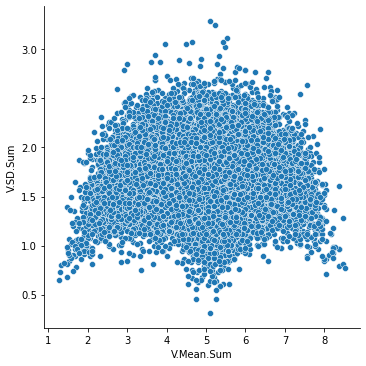

In [36]:
sns.relplot(x='V.Mean.Sum', y='V.SD.Sum', data=engels)

In [37]:
#see the highest and lowest ranked words on dominance
engels.sort_values('D.Mean.Sum', ascending = False)

,Word,V.Mean.Sum,V.SD.Sum,V.Rat.Sum,A.Mean.Sum,A.SD.Sum,A.Rat.Sum,D.Mean.Sum,D.SD.Sum,D.Rat.Sum,...,A.Rat.L,A.Mean.H,A.SD.H,A.Rat.H,D.Mean.L,D.SD.L,D.Rat.L,D.Mean.H,D.SD.H,D.Rat.H
8699,paradise,7.00,2.33,22,4.82,2.95,22,7.90,1.58,21,...,9,4.62,3.25,13,7.92,1.26,13,7.88,2.10,8
13732,win,6.97,2.09,40,5.61,3.24,23,7.86,1.32,22,...,11,6.17,3.01,12,7.86,1.51,14,7.88,0.99,8
10889,self,6.86,1.64,22,4.78,2.97,23,7.74,1.73,19,...,9,5.07,3.05,14,7.62,1.82,16,8.33,1.15,3
6260,incredible,7.59,2.11,22,6.35,2.87,20,7.74,1.91,19,...,7,5.54,3.15,13,7.71,2.21,7,7.75,1.82,12
2441,completion,7.38,1.72,21,4.24,2.68,25,7.73,1.28,22,...,17,5.00,2.27,8,7.70,1.34,10,7.75,1.29,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13011,uncontrollable,3.84,1.83,19,5.81,2.06,21,2.18,1.26,22,...,8,5.77,2.09,13,2.25,1.42,12,2.10,1.10,10
3912,earthquake,3.05,2.09,21,6.76,2.39,21,2.14,1.46,22,...,8,6.77,2.42,13,2.17,1.34,12,2.10,1.66,10
7179,lobotomy,2.45,2.13,22,5.32,2.65,19,2.00,1.55,21,...,8,5.64,2.58,11,2.22,1.92,9,1.83,1.27,12
345,alzheimers,2.26,1.82,19,4.50,2.35,22,2.00,1.68,23,...,11,5.18,2.32,11,2.23,2.05,13,1.70,1.06,10


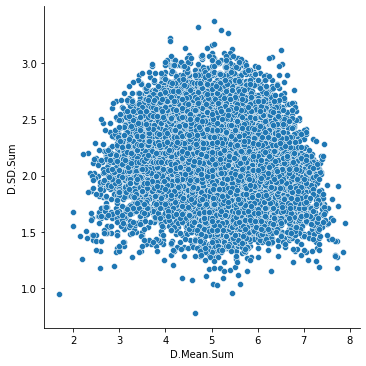

In [38]:
sns.relplot(x='D.Mean.Sum', y='D.SD.Sum', data=engels)

In [39]:
#see the highest and lowest ranked words on arousal
engels.sort_values('A.Mean.Sum', ascending = False)

,Word,V.Mean.Sum,V.SD.Sum,V.Rat.Sum,A.Mean.Sum,A.SD.Sum,A.Rat.Sum,D.Mean.Sum,D.SD.Sum,D.Rat.Sum,...,A.Rat.L,A.Mean.H,A.SD.H,A.Rat.H,D.Mean.L,D.SD.L,D.Rat.L,D.Mean.H,D.SD.H,D.Rat.H
6423,insanity,2.70,1.81,20,7.79,1.44,19,4.12,2.39,26,...,12,7.14,1.86,7,4.31,2.30,16,3.80,2.62,10
5487,gun,3.66,2.55,41,7.74,1.91,19,4.71,2.91,48,...,11,6.62,2.50,8,5.19,2.80,26,4.14,3.00,22
10977,sex,6.73,2.07,22,7.60,2.01,915,6.17,2.55,40,...,504,7.64,1.87,411,5.60,2.87,15,6.52,2.33,25
9845,rampage,4.21,1.99,19,7.57,1.43,21,4.43,2.50,23,...,11,7.70,0.95,10,4.14,2.51,14,4.89,2.57,9
7251,lover,8.05,1.25,22,7.45,2.04,20,6.37,2.17,19,...,7,7.00,2.38,13,7.14,1.57,7,5.92,2.39,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11485,soothing,7.05,1.66,21,1.91,1.31,22,5.76,1.67,21,...,9,2.08,1.44,13,5.42,1.83,12,6.22,1.39,9
7062,librarian,6.38,1.66,21,1.75,1.19,24,5.00,2.91,19,...,16,1.38,0.74,8,4.67,3.03,12,5.57,2.82,7
3859,dull,3.40,0.94,20,1.67,1.03,18,4.71,2.51,24,...,12,1.67,1.21,6,4.53,2.72,15,5.00,2.24,9
1701,calm,6.89,2.00,18,1.67,1.91,21,7.44,2.28,18,...,12,2.00,2.65,9,6.78,2.95,9,8.11,1.17,9


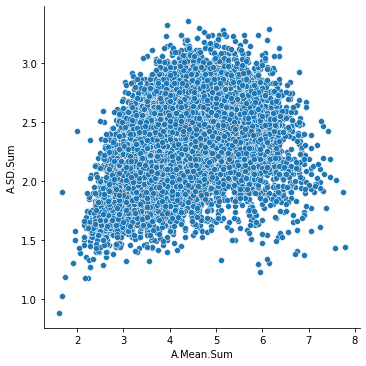

In [40]:
sns.relplot(x='A.Mean.Sum', y='A.SD.Sum', data=engels)

The tables show the 5 highest ranked words for the chosen variable, f.e. Valence, and the lowest ranked words. The highest and lowest ranked words do not suprise me. Undernead each table there is a scatterplot with the mean and standard diviation of the variable. The means of Valence and Dominance do not seem to be linked to their respective standard diviations (although this will be calculated later to confirm this idea). The average and the standard diviation of Arousal do seem to be linked to each other. For higher scores on the Arousal measure there seem to be higher standard diviations. This means that the higher words score on average on Arousal, the more people's answers differ in what score they would give a word. A word like 'grain', ranked lowest for Arousal, could thus be easier to agree on then what score 'lover' should get. The words that yield an average score of 4 or 5 seem to have the highest standard diviations. That means that the relationship is not exactly a lineair corelation.

Let's corelate the corelations between the different measures.

<AxesSubplot:>

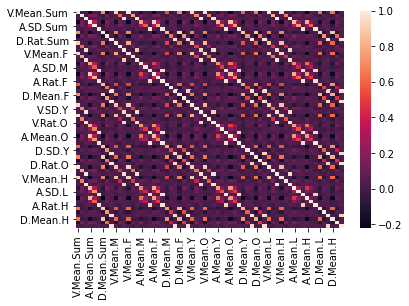

In [41]:
engcor = engels.corr()
sns.heatmap(engcor)

This representation is hard to interpret. Therefor I will calculate the corelations seperataly in the next cells. After all correlations are calcultated I will try to interpret them.

In [42]:
print('V mean and V SD')
print(engels['V.Mean.Sum'].corr(engels['V.SD.Sum']))
print('V mean and A SD')
print(engels['V.Mean.Sum'].corr(engels['A.SD.Sum']))
print('V mean and D SD')
print(engels['V.Mean.Sum'].corr(engels['D.SD.Sum']))
print('V mean and D mean')
print(engels['V.Mean.Sum'].corr(engels['D.Mean.Sum']))
print('V mean and A mean')
print(engels['V.Mean.Sum'].corr(engels['A.Mean.Sum']))

V mean and V SD
0.020417692407904458
V mean and A SD
0.010799499968058509
V mean and D SD
-0.1679502800731132
V mean and D mean
0.7166292080212395
V mean and A mean
-0.1848259325933808


In [43]:
print('A mean and V SD')
print(engels['A.Mean.Sum'].corr(engels['V.SD.Sum']))
print('A mean and A SD')
print(engels['A.Mean.Sum'].corr(engels['A.SD.Sum']))
print('A mean and D SD')
print(engels['A.Mean.Sum'].corr(engels['D.SD.Sum']))
print('A mean and D mean')
print(engels['A.Mean.Sum'].corr(engels['D.Mean.Sum']))

A mean and V SD
0.14021076053616371
A mean and A SD
0.36008599927239393
A mean and D SD
0.15729423812568136
A mean and D mean
-0.17999185926500058


In [44]:
print('D mean and V SD')
print(engels['D.Mean.Sum'].corr(engels['V.SD.Sum']))
print('D mean and A SD')
print(engels['D.Mean.Sum'].corr(engels['A.SD.Sum']))
print('D mean and D SD')
print(engels['D.Mean.Sum'].corr(engels['D.SD.Sum']))

D mean and V SD
-0.03745336186639275
D mean and A SD
-0.05251475769362758
D mean and D SD
-0.13989339125144887


In [45]:
print('V SD and A SD')
print(engels['V.SD.Sum'].corr(engels['A.SD.Sum']))
print('V SD and D SD')
print(engels['V.SD.Sum'].corr(engels['D.SD.Sum']))
print('A SD and D SD')
print(engels['A.SD.Sum'].corr(engels['D.SD.Sum']))

V SD and A SD
0.15720694715288702
V SD and D SD
0.13055186530006282
A SD and D SD
0.11815876902697164


The average of Valence and Dominance correlate quite strongly. The corelation between the means of Valence and Arousal seems insignificant (-0.18). It is remarkable however that the corelation between the average of Dominance and Arousal is very similar (-0.18). I wil therefor plot the relations between the pairs of variables in the next cells.

Most standard diviations do not have remarkable correlations with other variables. The Arousal mean and standard diviation correlation is the highest (0.36) and has been plotted before.

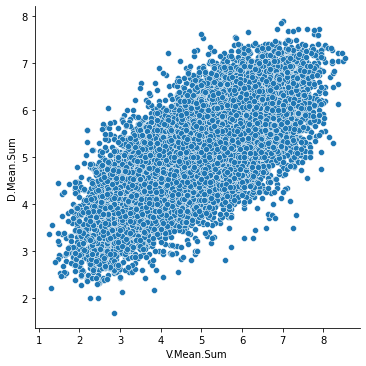

In [40]:
sns.relplot(x='V.Mean.Sum', y='D.Mean.Sum', data=engels)

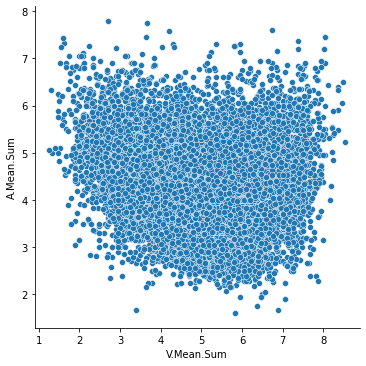

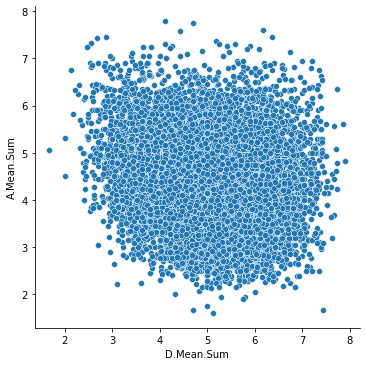

In [41]:
sns.relplot(x='V.Mean.Sum', y='A.Mean.Sum', data=engels)
sns.relplot(x='D.Mean.Sum', y='A.Mean.Sum', data=engels)

The graphs show a lineair relationship between the average of Valence and Dominance. Words that are rated more positivly are also seen as more dominant. There seem to be no clear relationship between Arousal and Valence or Arousal and Dominance, except for the fact that the down left corner in the graphs is empty. There are no words that score low on both Dominance and Arousal. Further, there are no words that score low on Valence and low on Dominance.

### 2.3. Analyses on men and women

In this section I compare the means and standard diviations of men and women. I try to find interesting differences. I further explore the standard diviations of Valence as it had an interesting distribution.

In [46]:
print(engels['V.Mean.M'].corr(engels['V.Mean.F']))
print(engels['A.Mean.M'].corr(engels['A.Mean.F']))
print(engels['D.Mean.M'].corr(engels['D.Mean.F']))
print(engels['V.SD.M'].corr(engels['V.SD.F']))
print(engels['A.SD.M'].corr(engels['A.SD.F']))
print(engels['D.SD.M'].corr(engels['D.SD.F']))

0.7892158707768634
0.516513215580856
0.5927126260386144
0.11769821899043922
0.15246400541886254
0.11855585321560129


The corelation between the averages for men and women are pretty high. The other corelations however suggest differences between these 2 genders. I think it is therefor interesting to plot them.

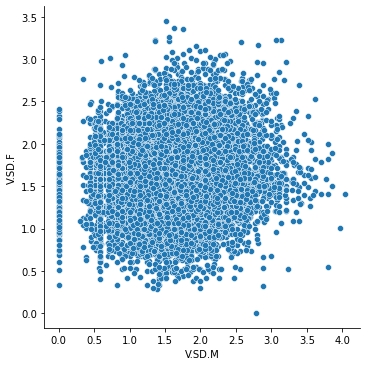

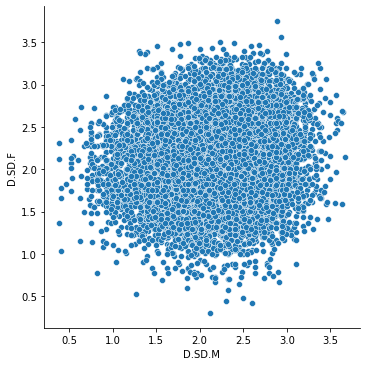

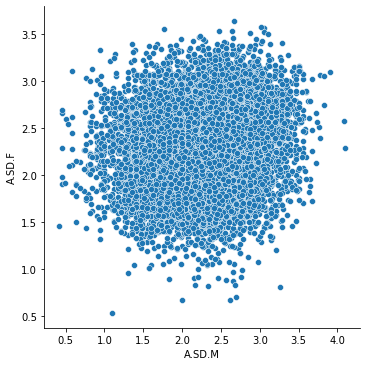

In [47]:
sns.relplot(x='V.SD.M', y='V.SD.F', data=engels)
sns.relplot(x='D.SD.M', y='D.SD.F', data=engels)
sns.relplot(x='A.SD.M', y='A.SD.F', data=engels)

The first graph between the standard diviation for Valence shows that there are some words were men have a standard diviation of 0.0 while womens scores differ more from one another. I am curious as to what words yield an SD of zero, and look for that in the next cell. The other 2 graphs (dominance SD and Arousal SD) do not display any clear tendencies: some words yield more differences in women, some yield more differences in men.

In [48]:
engels.loc[(engels['V.SD.M'] == 0.0),['Word', 'V.Mean.Sum', 'D.Mean.Sum', 'A.Mean.Sum', 'V.SD.M', 'D.SD.Sum', 'A.SD.Sum']]

,Word,V.Mean.Sum,D.Mean.Sum,A.Mean.Sum,V.SD.M,D.SD.Sum,A.SD.Sum
17,abode,5.28,5.05,2.90,0.0,2.44,1.89
79,accursed,3.21,4.13,5.33,0.0,2.30,2.13
155,admissible,5.16,6.21,2.90,0.0,1.90,1.71
253,AIDS,1.33,3.55,5.00,0.0,2.77,2.60
338,alternate,5.15,5.20,3.48,0.0,2.31,1.89
...,...,...,...,...,...,...,...
13669,whim,6.16,5.85,4.05,0.0,2.70,2.04
13680,whisk,5.74,5.20,4.48,0.0,2.57,1.66
13701,wide,4.58,6.20,3.05,0.0,1.99,2.12
13759,wiring,5.05,5.10,3.75,0.0,2.12,2.31


In [49]:
engels.loc[(engels['V.SD.M'] == 0.0),['Word', 'V.Mean.Sum', 'D.Mean.Sum', 'A.Mean.Sum', 'V.SD.Sum', 'D.SD.Sum', 'A.SD.Sum', 'V.Mean.M', 'A.Mean.M', 'D.Mean.M']].mean()

V.Mean.Sum    4.889194
D.Mean.Sum    5.247903
A.Mean.Sum    3.862984
V.SD.Sum      1.343629
D.SD.Sum      2.184677
A.SD.Sum      2.189839
V.Mean.M      4.806452
A.Mean.M      3.939919
D.Mean.M      5.373226
dtype: float64

There are 124 words that get exactly the same score from men for Valence. Futher, there seems to be no clear pattern for these words: for other variables they have very different scores and I cannot detect a common theme for these words. The standard diviation of Valence  for these words only is lower then the standard diviation of Valence for all words combined (1.34 versus 1.68). For other measures there seems to be no clear difference or this subgroup and the overall population of words.

### 2.4. Analyses on young and old

In this section I explore the correlations between different means and standard diviations. Then I explore whether there are words that young and old have very different opinions on by creating a new column: I substract the average Valence score for elderly from the average Valence score for youth.

In [50]:
print(engels['V.Mean.Y'].corr(engels['V.Mean.O']))
print(engels['A.Mean.Y'].corr(engels['A.Mean.O']))
print(engels['D.Mean.Y'].corr(engels['D.Mean.O']))
print(engels['V.SD.Y'].corr(engels['V.SD.O']))
print(engels['A.SD.Y'].corr(engels['A.SD.O']))
print(engels['D.SD.Y'].corr(engels['D.SD.O']))

0.8175854278091365
0.5000246202207895
0.590903901059437
0.10604617934022101
0.12183945406806707
0.09342211787333662


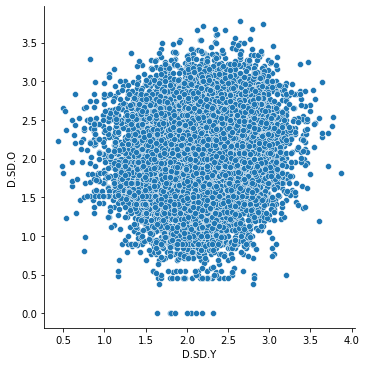

In [51]:
sns.relplot(x='D.SD.Y', y='D.SD.O', data=engels)

Young and old people give quite similar Valence-scores to words, as is indicated by the high corelation (0.82). The standard diviation of Dominance is the one that is most different in these 2 groups. There is however no clear pattern, as is shown in the graph: sometimes young people have a higher standard diviation for a particular word and in other instances old people have a higher standard diviation.

The previous 2 cells compare the averages of all words rated by youth and old people. I wondered whether there are individual words that young and old people have very diffent opinions about. To answer this question I made a new column 'YO'. It substracts the Valence score given by old people from the Valence score given by young people. It thus shows the difference in points that young vs old people give the word. In the next cells I run some code to know more about this interesting differences.

In [52]:
engels['YO'] = engels['V.Mean.Y']- engels['V.Mean.O']

In [53]:
engels['YO'].mean()

0.05379302910528197

<AxesSubplot:xlabel='YO'>

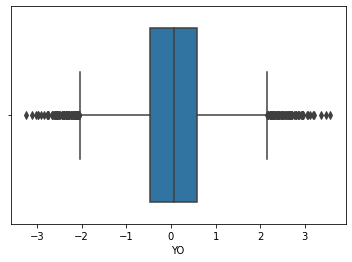

In [54]:
sns.boxplot(x='YO', data=engels)

In [55]:
len(engels.loc[(engels['V.SD.M'] == 0.0), 'Word'])

124

In [56]:
engels.sort_values('YO', ascending = False)

,Word,V.Mean.Sum,V.SD.Sum,V.Rat.Sum,A.Mean.Sum,A.SD.Sum,A.Rat.Sum,D.Mean.Sum,D.SD.Sum,D.Rat.Sum,...,A.Mean.H,A.SD.H,A.Rat.H,D.Mean.L,D.SD.L,D.Rat.L,D.Mean.H,D.SD.H,D.Rat.H,YO
4995,fuck,5.23,3.25,22,7.14,1.98,21,5.47,2.21,17,...,7.00,2.14,15,5.00,2.35,9,6.00,2.07,8,3.57
7627,mercenary,3.89,2.21,19,5.14,3.04,21,4.29,2.35,28,...,6.62,2.77,8,4.38,2.66,16,4.17,1.99,12,3.48
4997,fucking,5.09,3.29,22,6.86,2.29,21,4.94,2.69,16,...,6.80,2.40,15,4.89,2.62,9,5.00,3.00,7,3.36
1412,boxing,4.47,2.59,19,5.73,3.15,22,5.63,1.86,19,...,7.62,1.51,8,6.22,1.92,9,5.10,1.73,10,3.20
5513,gym,5.84,2.52,19,5.00,3.02,22,5.96,2.15,28,...,6.12,2.70,8,6.06,2.43,16,5.83,1.80,12,3.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8431,openness,6.52,2.42,21,4.37,2.69,19,5.86,1.90,21,...,4.82,3.19,11,5.44,1.88,9,6.17,1.95,12,-2.97
10516,royalty,5.52,2.54,21,4.32,2.43,25,5.68,2.77,19,...,3.89,2.37,9,6.00,3.00,11,5.25,2.55,8,-2.99
9147,playtime,6.63,2.54,19,5.10,2.43,21,6.96,1.55,23,...,5.18,1.89,11,7.23,1.09,13,6.60,2.01,10,-3.03
13827,worship,5.57,2.68,21,3.78,2.61,23,4.65,2.89,17,...,4.25,2.96,12,3.89,2.15,9,5.50,3.51,8,-3.12


The previous cells show that young and old do not differ much on what Valence-score they give a word as the average difference is only half a point. The boxplot also shows that half of the words have a difference of half a point or less. There are 124 words that young and old have exactly the same average Valence-score. However there are words on which they have remarkably different opinions. Young people think much more positivly about words such as 'fuck', 'fucking' and 'gym'. Older people have more positive evaluations about words such as 'scripture', 'worship' and 'openness'.

### 2.5. Analyses on people with different educational levels

In this section I check the corelations between the means and standard diviations of people with lower education versus higher education. Then I dive deeper into their opinions of words related to the schoolsystem, with the use of regular expressions. I wondered whether there would be a big difference in opinion on school-related words such as 'school' and 'exam'.

In [57]:
print(engels['V.Mean.L'].corr(engels['V.Mean.H']))
print(engels['A.Mean.L'].corr(engels['A.Mean.H']))
print(engels['D.Mean.L'].corr(engels['D.Mean.H']))
print(engels['V.SD.L'].corr(engels['V.SD.H']))
print(engels['A.SD.L'].corr(engels['A.SD.H']))
print(engels['D.SD.L'].corr(engels['D.SD.H']))

0.8319782430043601
0.4666070233184241
0.6084974179156929
0.1655719021646588
0.09936004801972223
0.05970711060547128


As was the case in the other 2 comparisons (between genders and ages) the means of Valence are highly correlated. The standard diviations have again much lower corelations.

In [58]:
engels.loc[(engels.Word.str.contains('.*school.*')==True),['Word', 'V.Mean.L', 'V.Mean.H', 'A.Mean.L', 'A.Mean.H', 'D.Mean.L', 'D.Mean.H']]

,Word,V.Mean.L,V.Mean.H,A.Mean.L,A.Mean.H,D.Mean.L,D.Mean.H
9397,preschool,6.10,6.00,4.45,2.33,3.58,5.25
10738,school,4.79,6.50,4.83,4.47,5.33,6.50
10739,schoolboy,5.80,5.22,2.82,3.00,5.00,3.90
10740,schoolgirl,5.73,6.08,5.20,4.58,5.40,6.40
10741,schoolhouse,6.00,6.00,3.00,3.44,3.85,5.50
10742,schooling,6.00,6.40,4.43,4.71,5.53,5.47
10743,schoolmaster,5.11,4.82,3.27,3.20,4.89,4.57
10744,schoolteacher,5.10,5.18,3.31,5.14,5.92,4.40
10745,schoolwork,4.69,4.75,3.73,4.75,6.41,4.67
10746,schoolyard,5.00,5.82,5.12,5.55,3.89,6.08


In [59]:
engels.loc[(engels.Word.str.contains('.*school.*')==True),['Word', 'V.Mean.L', 'V.Mean.H', 'A.Mean.L', 'A.Mean.H', 'D.Mean.L', 'D.Mean.H']].mean()

V.Mean.L    5.432
V.Mean.H    5.677
A.Mean.L    4.016
A.Mean.H    4.117
D.Mean.L    4.980
D.Mean.H    5.274
dtype: float64

In [60]:
engels.loc[(engels.Word.str.contains('.*educat.*')==True),['Word', 'V.Mean.L', 'V.Mean.H', 'A.Mean.L', 'A.Mean.H', 'D.Mean.L', 'D.Mean.H']]

,Word,V.Mean.L,V.Mean.H,A.Mean.L,A.Mean.H,D.Mean.L,D.Mean.H
3947,educate,7.27,7.70,4.00,4.90,6.15,7.55
3948,education,6.54,6.62,4.60,4.67,6.18,7.45
3949,educational,6.44,6.73,5.09,3.90,5.33,6.57
3950,educator,6.46,6.83,3.43,3.62,6.33,5.90
13064,uneducated,3.67,2.45,4.55,3.20,4.83,6.43


In [61]:
engels.loc[(engels.Word.str.contains('.*exam.*')==True),['Word', 'V.Mean.L', 'V.Mean.H', 'A.Mean.L', 'A.Mean.H', 'D.Mean.L', 'D.Mean.H']]

,Word,V.Mean.L,V.Mean.H,A.Mean.L,A.Mean.H,D.Mean.L,D.Mean.H
4273,exam,4.69,3.75,4.33,6.75,4.65,3.33
4274,examination,4.83,5.30,4.46,4.57,4.92,5.20
4275,examine,5.33,5.89,3.27,4.78,5.58,6.67
4276,examiner,4.69,3.62,3.70,3.70,5.78,6.64
4277,example,4.58,5.33,4.00,3.31,6.43,6.92


I looked for differences in perception of school-related words between people of lower and higher education but I found only a few differences.
'School' is rated much more positivly by people with higher education.
'Schoolteacher' elecits more arousal in people with higher education.
'Schoolyard' is seen as a less dominant word by people who have lower education.
'Uneducated' is seen more negativly, triggers less arousal but shows more dominance according to people with higher education.
'Educational' is a word that triggers more arousal in people of lower education.

### 2.6. Conclusions

I started with an analysis of the data for the whole population. I learned that words such as 'vacation' have a positive meaning for most people, while 'racist' and 'pedophile' have the most negative meanings. 'Paradise' and 'win' have high dominance-scores and 'dementia' has a very low dominance-score. The words that elecit most arousal are 'insanity', 'gun' and 'sex'. 'Grain' and 'calm' elecit the least amount of arousal on average.

Remarkable corelations were:
1. The average and the standard diviation of Arousal. For higher scores on the Arousal measure there seem to be higher standard diviations.
2. The averages for Dominance and Valence corelated positivly. Words that have more positive meaning are also rated as being more dominant.

Men and women yield relativly similar scores of their averages but the standard diviations per measure are very different. Surprisingly, there are 124 words for which men have 0.0 standard diviation on the Valence-measure. Women have varying standard diviations for those words. There seems to be no common theme in these words.

Young and old people have again similar scores for their average-scores but more different standard diviations. I zoomed in on those words that old and young people different most in the valence-measure. Overall, the ratings for most words are very similar. 'Fuck' and 'Fucking' are rated much more positivly by young people. 'Worship' and 'Scripture' are seen as much more positive words by old people.

The analyses on people with different educational levels showed again that the averages of the different measure were fairly similar, while the standard diviations differ. On the level of individual words there are some differences between these 2 groups. 'School' is rated much more positivly by people with higher education. 'Uneducated' is seen more negativly, triggers less arousal but shows more dominance for people with higher education. 'Educational' is a word that triggers more arousal in people of lower education.

# 3. Comparing the Dutch and the English words

First I want to say the scores cannot be compared directly because they were given other scales. The dutch scale ran from 1 to 7, while the english scale ran from 1 to 9 and other words were used. To make the datasets more comparable I first filter for the words that are in both datasets. I will then compare whether the words that rank the highest and the lowest on any measures are comparable.

### 3.1. Match the words

In the next cells I determine which words are in both datasets and then I create new dataframes: a dutch one filtered to obtain only the words present in both and an english one with the same words. Later I will be able to compare their averages. This step made it clear that several words in dutch were translated to 1 word in english. Therefor there are more words in the new filtered dutch dataframe, then there are in the new filtered english dataframe.

In [62]:
Translationl = Nediedereen['Translation'].tolist()
Wordseng = engels['Word'].tolist()

print(Translationl, Wordseng)

['to stroke', 'eel', 'alms', 'attentive', 'pleasant', 'assault', 'offense', 'offensive', 'attractive', 'attack', 'to attack', 'offensive', 'acquisition', 'respect', 'considerably', 'monkey', 'nature', 'strawberry', 'earthquake', 'earth', 'ass', 'ace', 'absurd', 'abbot', 'accent', 'to deem', 'acne', 'act', 'active', 'acute', 'viper', 'nobility', 'eagle', 'breath', 'vein', 'address', 'advice', 'lawyer', 'to break off', 'envy', 'dependent', 'aversion', 'to dislike', 'averse', 'farewell', 'to screen', 'horror', 'distance', 'repulsive', 'to repell', 'waste', 'to wait', 'waiting', 'to reject', 'agency', 'aggression', 'aggressive', 'aids', 'field', 'agreement', 'document', 'alarm', 'album', 'alcoholism', 'alert', 'alone', 'altar', 'craft', 'ambition', 'ambitious', 'office', 'other', 'sting', 'fear', 'anxious', 'anise', 'carnation', 'anchor', 'anchovy', 'anti', 'antique', 'antelope', 'answer', 'anus', 'apathy', 'apathetic', 'apple', 'applause', 'aquarium', 'labor', 'are', 'eagle', 'suspicion',

In [63]:
#create lists that contain only those words present in both datasets
usedutch= []
useenglish= []

for word in Wordseng:
    for woord in Translationl:
        if word== woord:
            if word not in useenglish:
                useenglish.append(word)
            if woord not in usedutch:
                usedutch.append(woord)

In [64]:
print(useenglish, usedutch)
print(len(usedutch))
len(useenglish)

['absent', 'absurd', 'abuse', 'accent', 'accident', 'accurate', 'ace', 'acid', 'acne', 'acorn', 'acquisition', 'act', 'active', 'acute', 'addicted', 'address', 'admirable', 'admiration', 'adolescent', 'adult', 'advantage', 'adventurous', 'advice', 'afraid', 'agency', 'aggression', 'aggressive', 'agony', 'agreement', 'aids', 'air', 'alarm', 'album', 'alcoholism', 'alert', 'alive', 'alley', 'alone', 'altar', 'ambition', 'ambitious', 'anchor', 'anemic', 'angel', 'anger', 'angle', 'angry', 'anguished', 'animal', 'animated', 'annoyance', 'annoyed', 'annoying', 'answer', 'ant', 'antelope', 'anti', 'antique', 'anus', 'anxious', 'apathy', 'appearance', 'applause', 'apple', 'appliance', 'apron', 'aquarium', 'ark', 'arm', 'armchair', 'armed', 'armor', 'armpit', 'army', 'arrest', 'arrogant', 'arrow', 'art', 'artistic', 'ashamed', 'aspect', 'ass', 'assault', 'assertive', 'asshole', 'asthma', 'asylum', 'athlete', 'atlas', 'atmosphere', 'attack', 'attentive', 'attic', 'attractive', 'auditorium', 'au

2620

In [65]:
Vergelijk = Nediedereen.loc[Nediedereen.Translation.isin(usedutch)]

In [66]:
Compare = engels.loc[engels.Word.isin(useenglish)]

### 3.2. Compare the scores

Here I compare the scores english and dutch words get for Valence.

In [67]:
print(Vergelijk.sort_values('ValenceMA'))
Compare.sort_values('V.Mean.Sum')

             Words Translation  ValenceMA  ValenceSDA  ValenceNA  ArousalMA  \
2504      pedofiel   pedophile   1.140625    0.393083       64.0   5.000000   
1472        kanker      cancer   1.156250    0.365963       64.0   4.875000   
1370        incest      incest   1.203125    0.509581       64.0   5.015625   
4202     zelfmoord     suicide   1.296875    0.608920       64.0   5.343750   
3828  verkrachting        rape   1.312500    0.794325       64.0   6.265625   
...            ...         ...        ...         ...        ...        ...   
3979         vrede       peace   6.421875    0.772641       64.0   2.828125   
186    beeldschoon   beautiful   6.468750    0.712000       64.0   4.500000   
1005  gelukkigheid   happiness   6.476190    0.618457       63.0   5.079365   
1900        liefde        love   6.531250    0.853913       64.0   5.593750   
1004      gelukkig       happy   6.609375    0.632887       64.0   4.640625   

      ArousalSDA  ArousalNA  DominanceMA  Dominance

,Word,V.Mean.Sum,V.SD.Sum,V.Rat.Sum,A.Mean.Sum,A.SD.Sum,A.Rat.Sum,D.Mean.Sum,D.SD.Sum,D.Rat.Sum,...,A.Mean.H,A.SD.H,A.Rat.H,D.Mean.L,D.SD.L,D.Rat.L,D.Mean.H,D.SD.H,D.Rat.H,YO
8846,pedophile,1.26,0.65,19,5.05,3.21,22,3.37,2.04,27,...,5.83,2.71,6,3.58,2.11,12,3.20,2.04,15,-0.13
12660,torture,1.40,0.82,20,5.09,2.55,45,2.76,2.05,45,...,5.31,2.41,16,2.88,2.18,26,2.58,1.89,19,0.12
8003,murder,1.48,0.81,21,6.24,2.76,21,3.38,2.28,16,...,6.40,2.59,15,3.56,2.46,9,3.14,2.19,7,0.55
42,abuse,1.53,1.07,19,6.21,2.17,42,2.90,2.17,20,...,6.55,2.01,20,3.89,2.32,9,2.09,1.76,11,-0.48
9860,rape,1.54,1.36,82,7.24,1.99,83,2.47,2.29,107,...,7.36,1.79,45,3.02,2.77,50,1.98,1.64,57,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,free,8.25,1.36,870,5.38,3.04,42,6.50,2.71,50,...,5.53,3.29,19,6.33,3.03,24,6.65,2.43,26,-0.16
4121,enjoyment,8.37,0.96,19,5.48,2.72,44,6.56,2.12,25,...,4.71,2.71,17,6.72,2.32,18,6.14,1.57,7,0.36
5007,fun,8.37,0.96,19,6.32,2.62,41,7.04,1.85,46,...,5.64,2.84,11,7.18,1.98,28,6.83,1.65,18,0.57
5595,happy,8.47,1.28,43,6.05,2.13,21,7.21,1.96,62,...,5.64,2.16,11,7.05,2.28,39,7.48,1.24,23,-0.17


Some words recieved similar Valence ratings in Dutch and in English. 'Pedophile' and 'Rape' are both among the 5 most negative words, and 'happy' is one of the words with the most positive meaning. The words 'free', 'enjoyment' and 'fun' are highly ranked for Valence by the english audience, but are not in the top 5 of dutch people. I wonder how they are rated in the dutch dataset.

In [68]:
Vergelijk.loc[Vergelijk['Translation'] == 'free']

,Words,Translation,ValenceMA,ValenceSDA,ValenceNA,ArousalMA,ArousalSDA,ArousalNA,DominanceMA,DominanceSDA,DominanceNA,AoAMA,AoASDA,AoANA,Length,Dominancecategories
1132,gratis,free,5.890625,1.025348,64.0,3.812500,1.500000,64.0,4.390625,1.242338,64.0,6.096774,1.535249,32.0,6,2
3989,vrij,free,5.984375,0.863588,64.0,3.953125,1.617657,64.0,5.046875,1.277767,64.0,5.129032,1.384243,32.0,4,2


In [69]:
Vergelijk.loc[Vergelijk['Translation'] == 'enjoyment']

,Words,Translation,ValenceMA,ValenceSDA,ValenceNA,ArousalMA,ArousalSDA,ArousalNA,DominanceMA,DominanceSDA,DominanceNA,AoAMA,AoASDA,AoANA,Length,Dominancecategories
1015,genot,enjoyment,6.125,0.82616,64.0,4.90625,1.399759,64.0,5.125,1.147807,64.0,9.225806,2.654677,32.0,5,2


In [70]:
Vergelijk.loc[Vergelijk['Translation'] == 'fun']

,Words,Translation,ValenceMA,ValenceSDA,ValenceNA,ArousalMA,ArousalSDA,ArousalNA,DominanceMA,DominanceSDA,DominanceNA,AoAMA,AoASDA,AoANA,Length,Dominancecategories
2595,plezier,fun,6.21875,0.844567,64.0,5.390625,1.163154,64.0,4.96875,1.068581,64.0,5.032258,1.779211,32.0,7,2
2673,pret,fun,6.00000,0.835711,64.0,5.421875,1.035937,64.0,4.62500,1.046536,64.0,5.548387,1.997310,32.0,4,2


The 3 cells above show that often multiple dutch words have the same english translation, but they do still differ a little bit in their meaning. For example 'gratis' en 'vrij' have a difference of 1 point on the Dominance-mean. This subtle difference exist between those 2 words but also make it very clear that 'free' is not an exact translation of what these words mean. Words that can be translated to oneanother can still differ in their meaning and thus their scores for Valence, Dominance and Arousal.
Overall however these words that are top 5 in the english dataset for Valence also yield positive scores in dutch, so the meanings are not completly different.